[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ted59\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ted59\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Language distribution:
language
en    24961
ca       11
bn        8
de        6
fr        6
hu        6
Name: count, dtype: int64



Description of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       24998 non-null  object
 1   url       24998 non-null  object
 2   content   24998 non-null  object
 3   language  24998 non-null  object
dtypes: object(4)
memory usage: 781.3+ KB
None




First few rows of the dataset:
                        _id                                       url  \
0  65b9ce3ce0d60b0f8452d93f               https://docs.logrhythm.com/   
1  65b9ce3de0d60b0f8452d940       https://docs.logrhythm.com/#content   
2  65b9ce3ee0d60b0f8452d941          https://docs.logrhythm.com/?l=en   
3  65b9ce3ee0d60b0f8452d942  https://docs.logrhythm.com/?l=en#content   
4  65b9ce3fe0d60b0f8452d943     https://docs.logrhythm.

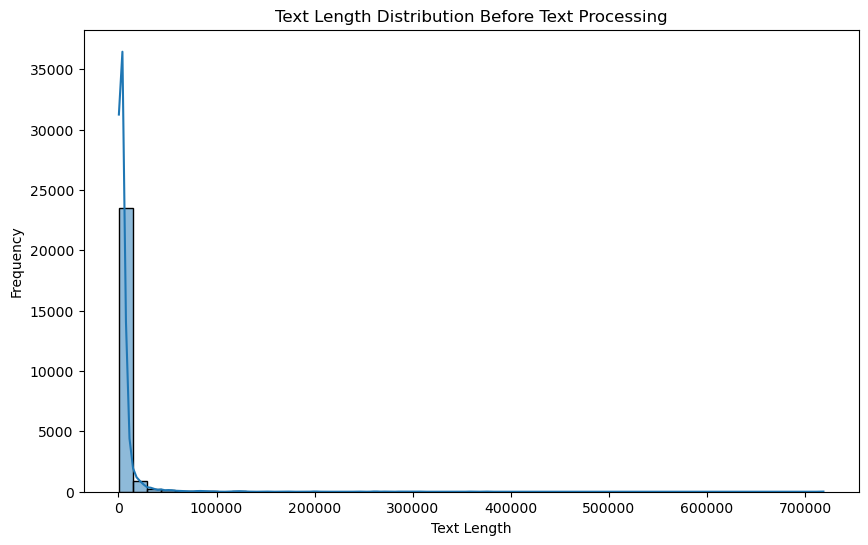

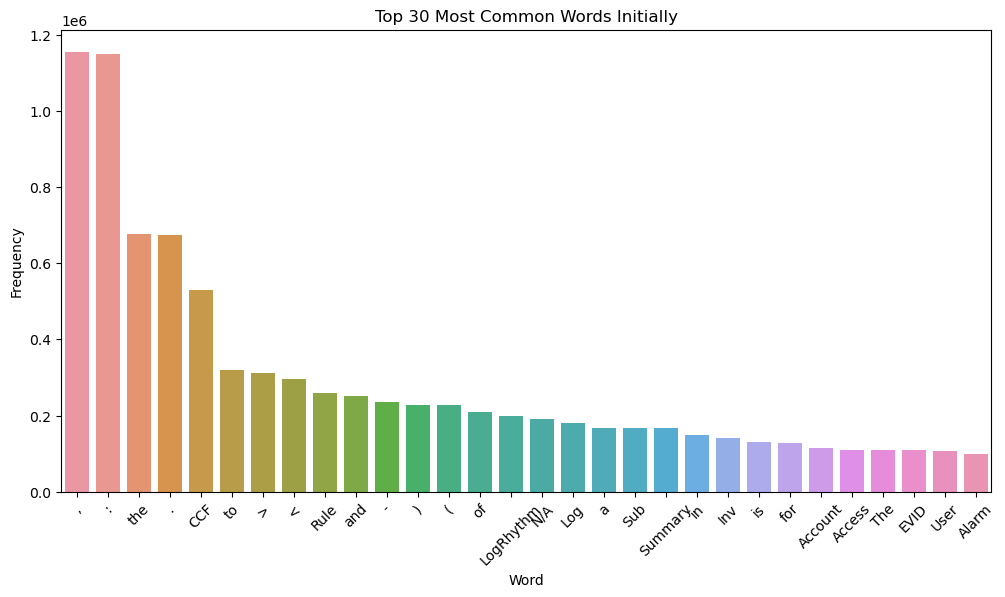

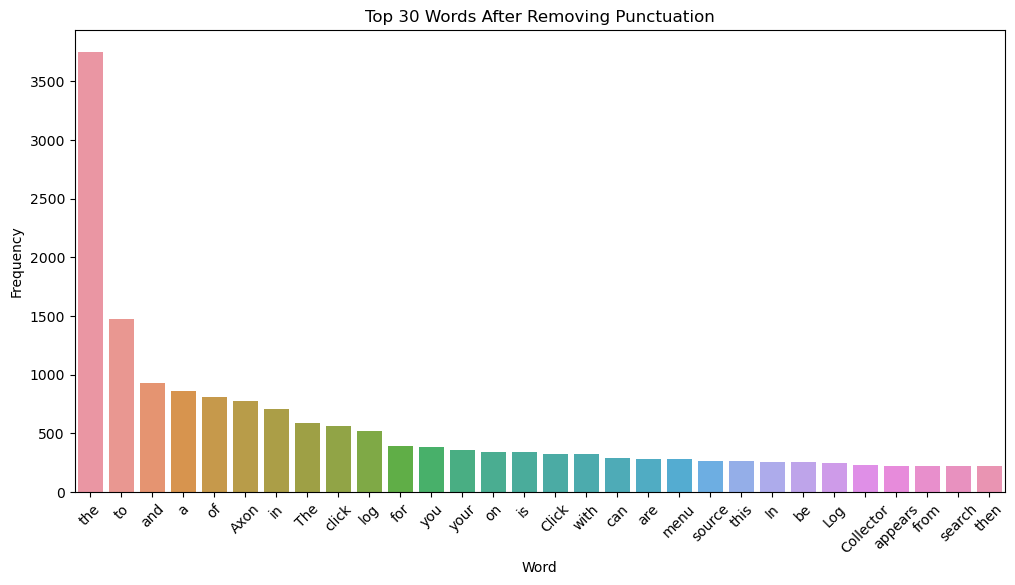

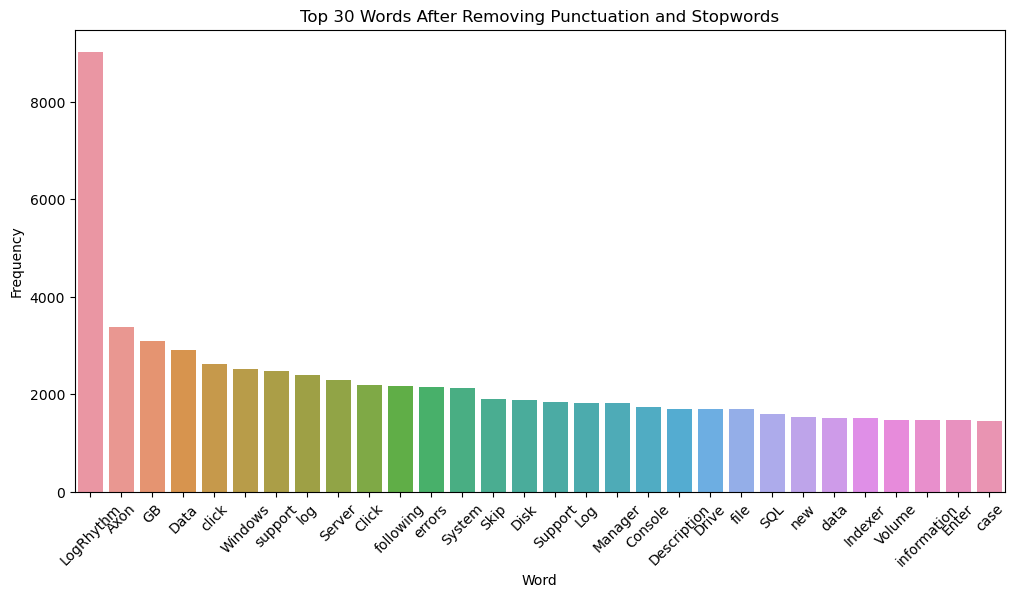


Description of the processed dataset:
<class 'pandas.core.series.Series'>
RangeIndex: 24998 entries, 0 to 24997
Series name: processed_content
Non-Null Count  Dtype 
--------------  ----- 
24998 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB
None




First few rows of the processed dataset:
                                   processed_content
0  LogRhythm Documentation Skip main content Show...
1  LogRhythm Documentation Skip main content Show...
2  LogRhythm Documentation Skip main content Show...
3  LogRhythm Documentation Skip main content Show...
4  LogRhythm Axon Skip main content Show navigati...




Descriptive Statistics for processed content:
count                                                 24998
unique                                                 3777
top       LogRhythm Open Collector Beats Skip main conte...
freq                                                    820
Name: processed_content, dtype: object




Description of processed text length:
count 

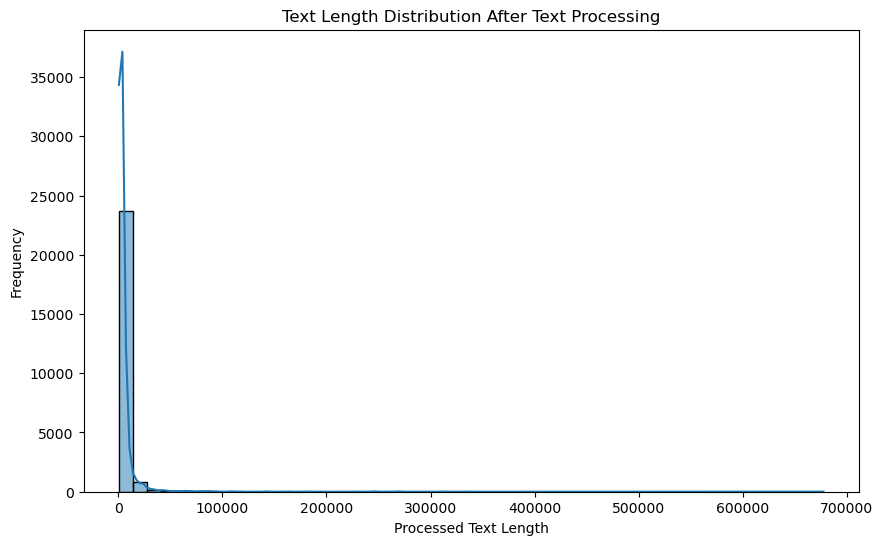

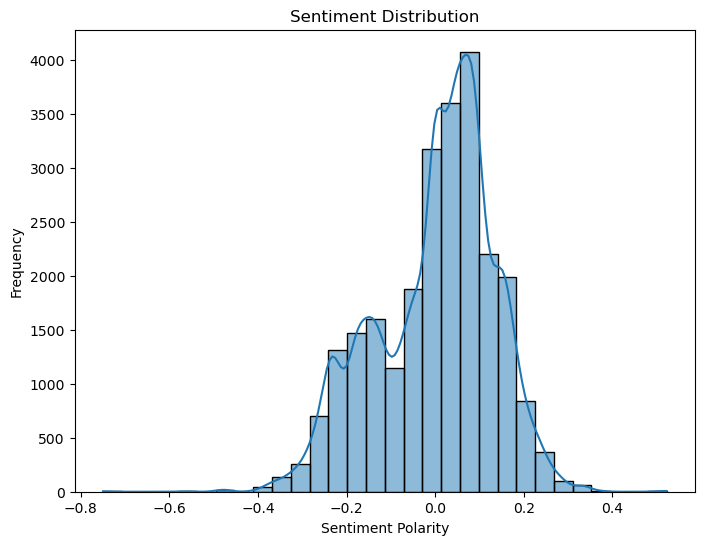

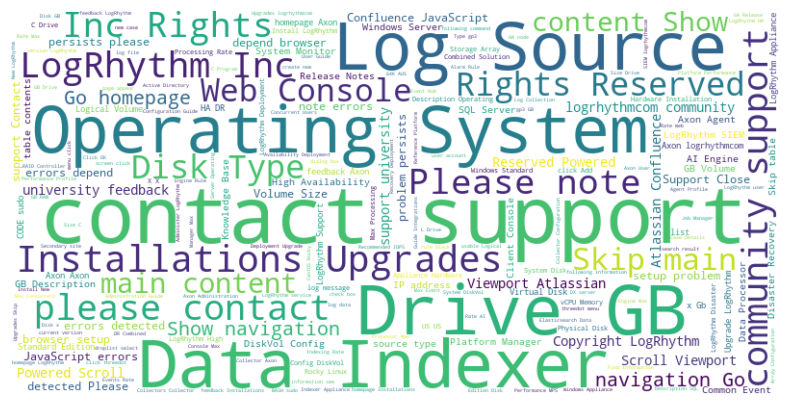

Top 10 words for Topic #0
['05', 'siem', 'source', 'initialize', 'cloud', 'error', 'configure', 'log', 'http', 'beat']


Top 10 words for Topic #1
['string', 'user', 'type', 'acct', 'rule', 'aie', 'log', 'authentication', 'failure', 'mas']


Top 10 words for Topic #2
['data', 'log', 'user', 'activity', 'access', 'alarm', 'account', 'inv', 'summary', 'ccf']


Top 10 words for Topic #3
['manager', 'file', 'monitor', 'web', 'user', 'console', 'l2', 'data', 'click', 'log']


Top 10 words for Topic #4
['configuration', 'general', 'default', 'information', 'event', 'syslog', 'log', 'evid', 'sub', 'rule']




In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
import string
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from langdetect import detect
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns

# Ensure NLTK components are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# MongoDB connection
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["WS_Data_DB"]  # Database name
collection = db["LogRhythmDocs"]  # Collection name

# Fetch data from MongoDB
documents = collection.find() 
df = pd.DataFrame(list(documents))

# Function for language detection
def language_detection(text):
    try:
        return detect(text)
    except:
        return "Unknown"

# Language Detection
df['language'] = df['content'].apply(language_detection)
print("\nLanguage distribution:")
print(df['language'].value_counts())
print ("\n" * 2)

# Display description of data
print("Description of the dataset:")
print(df.info())
print ("\n" * 2)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())
print ("\n" * 2)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())
print ("\n" * 2)

# Text Length Analysis
df['text_length'] = df['content'].apply(len)
print("\nDescription of text length:")
print(df['text_length'].describe())
print ("\n" * 2)

# Plot histogram for text length
plt.figure(figsize=(10, 6))
plt.title('Text Length Distribution Before Text Processing')
sns.histplot(df['text_length'], bins=50, kde=True)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Preload English stopwords
english_stopwords = set(nltk.corpus.stopwords.words('english'))

# Function for removing punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Function for removing stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

# Preprocessing text
def preprocess_text(text):
    text_no_punctuation = remove_punctuation(text)
    tokens = word_tokenize(text_no_punctuation)
    tokens_no_stopwords = remove_stopwords(tokens)
    return tokens_no_stopwords

# Tokenize the content
df['tokens'] = df['content'].apply(word_tokenize)

# Join the tokens into a single string for initial text
all_text_initial = ' '.join([word for tokens in df['tokens'] for word in tokens])

# Function to plot word frequencies using seaborn
def plot_word_frequencies(freq_dist, title, num_words=30):
    # Extract the most common words and their frequencies
    words, counts = zip(*freq_dist.most_common(num_words))
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(counts))
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Initial Word Frequency Plot
freq_dist_initial = FreqDist(word_tokenize(all_text_initial))
plot_word_frequencies(freq_dist_initial, 'Top 30 Most Common Words Initially')

# Word Frequency after removing punctuation
freq_dist_no_punctuation = FreqDist(word_tokenize(all_text_no_punctuation))
plot_word_frequencies(freq_dist_no_punctuation, 'Top 30 Words After Removing Punctuation')

# Word Frequency after removing punctuation and stopwords
freq_dist_processed = FreqDist(word_tokenize(all_text_processed))
plot_word_frequencies(freq_dist_processed, 'Top 30 Words After Removing Punctuation and Stopwords')

# Preprocess the content and create a new column for processed text
df['processed_content'] = df['content'].apply(preprocess_text).apply(' '.join)

# Display description of processed data
print("\nDescription of the processed dataset:")
print(df['processed_content'].info())
print ("\n" * 2)

# Display the first few rows of the processed dataset
print("\nFirst few rows of the processed dataset:")
print(df[['processed_content']].head())
print ("\n" * 2)

# Descriptive Statistics for processed data
print("\nDescriptive Statistics for processed content:")
print(df['processed_content'].describe())
print ("\n" * 2)

# Text Length Analysis for processed content
df['processed_text_length'] = df['processed_content'].apply(len)
print("\nDescription of processed text length:")
print(df['processed_text_length'].describe())
print ("\n" * 2)

# Plot histogram for processed text length
plt.figure(figsize=(10, 6))
plt.title('Text Length Distribution After Text Processing')
sns.histplot(df['processed_text_length'], bins=50, kde=True)
plt.xlabel('Processed Text Length')
plt.ylabel('Frequency')
plt.show()

# Sentiment Analysis
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
plt.title('Sentiment Distribution')
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text_processed)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Topic Modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['content'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topics
for index, topic in enumerate(lda.components_):
    print(f'Top 10 words for Topic #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

# Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

def ner(text):
    doc = nlp(text)
    return [(X.text, X.label_) for X in doc.ents]

# Apply NER to the 'content' column
df['named_entities'] = df['content'].apply(ner)